## Read the results of the adversarial robustness experiments

In [6]:
import os
import sys
# add to the path the source files
sys.path.append(os.path.dirname(os.getcwd()))

from src.dataset.counting_algorithm import subgraph_counting, subgraph_counting_all

import seml
from pathlib import Path
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from networkx import Graph
import dgl
import networkx as nx
from plots.graphs_info import adversarial_error, subgraph_count, edge_count, degree_distribution, real_adv_examples, best_adv_exaples, count_other_substructures, sign_adversarial_error

arch = 'I2GNN'
if arch == 'I2GNN':
    arch_name = 'I$^2$-GNN'
    loss = 'l1'
else:
    arch_name = arch
    loss = 'l1_count'
    
exp = 'sbm_30'


if loss == 'l1':
    loss_name = 'MAE'
elif loss =='l1_count':
    loss_name = 'MAE/count'
    
if arch == 'I2GNN':
    subgraphs = ['Triangle', '2-Path', '4-Clique', 'Chordal cycle', 'Tailed triangle', '3-Star','4-Cycle']
else:
    subgraphs = ['Triangle', '2-Path', '4-Clique', 'Chordal cycle', 'Tailed triangle', '3-Star','4-Cycle']
subgraphs = ['Triangle', 'Chordal cycle','4-Cycle']
budget_perc = {0:'1$\%$', 1:'5$\%$', 2:'10$\%$', 3:'25$\%$', 4:'50$\%$', 5:'100$\%$'}
exp_info = {'arch': arch_name, 'exp': exp, 'subgraphs': subgraphs, 'budget_perc': budget_perc, 'loss_name': loss_name, 'arch_file': arch}

experiment_name = f'robustness_{arch}_{exp}'
results: pd.DataFrame = seml.get_results(experiment_name, to_data_frame=True, fields=['config', 'result', 'stats'])
results = results.rename(columns={'result.test_error': 'Test', 'result.cross_test_errors_average': 'Cross Test', 'result.subgraph': 'Subgraph', 'result.test_count': 'Test Count'})

  0%|          | 0/10575 [00:00<?, ?it/s]

  0%|          | 0/10575 [00:00<?, ?it/s]

/home/francesco/miniconda3/envs/thesis/lib/python3.10/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [7]:
# sns.set_style("dark")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_palette("CMRmap_r")
font_dirs = ['fonts']
font_files = mpl.font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    mpl.font_manager.fontManager.addfont(font_file)
fpaths = mpl.font_manager.findSystemFonts()

# for i in fpaths:
#     f = mpl.font_manager.get_font(i)
#     print(f.family_name)
    
# plt.rcParams.update({
#     "text.usetex": True
# })
# plt.rcParams['font.family'] = 'Linux Libertine'
plt.rcParams['font.family'] = 'Gill Sans'
plt.rcParams['font.size'] = 18
delta = 1
edge=False
degree = False
graph = False
count = False
spath = False
spectrum = False
connectivity = False
sign_pres = False
count_sign = False
count_scatter = False
sign_adv = False
grad = False
edge_sign = False


## Beam preserving multiple strategy

consider oly permutations that leave the substructure count unchanged, keeping track of multiple examples at the same time

3525
[1, 4, 7, 20]
AOC 1 seed
Triangle:  0.0
Chordal cycle:  0.41375
4-Cycle:  0.7593750000000001
AOC all seeds
Triangle:  0.0
Chordal cycle:  0.06691666666666668
4-Cycle:  0.06541666666666666


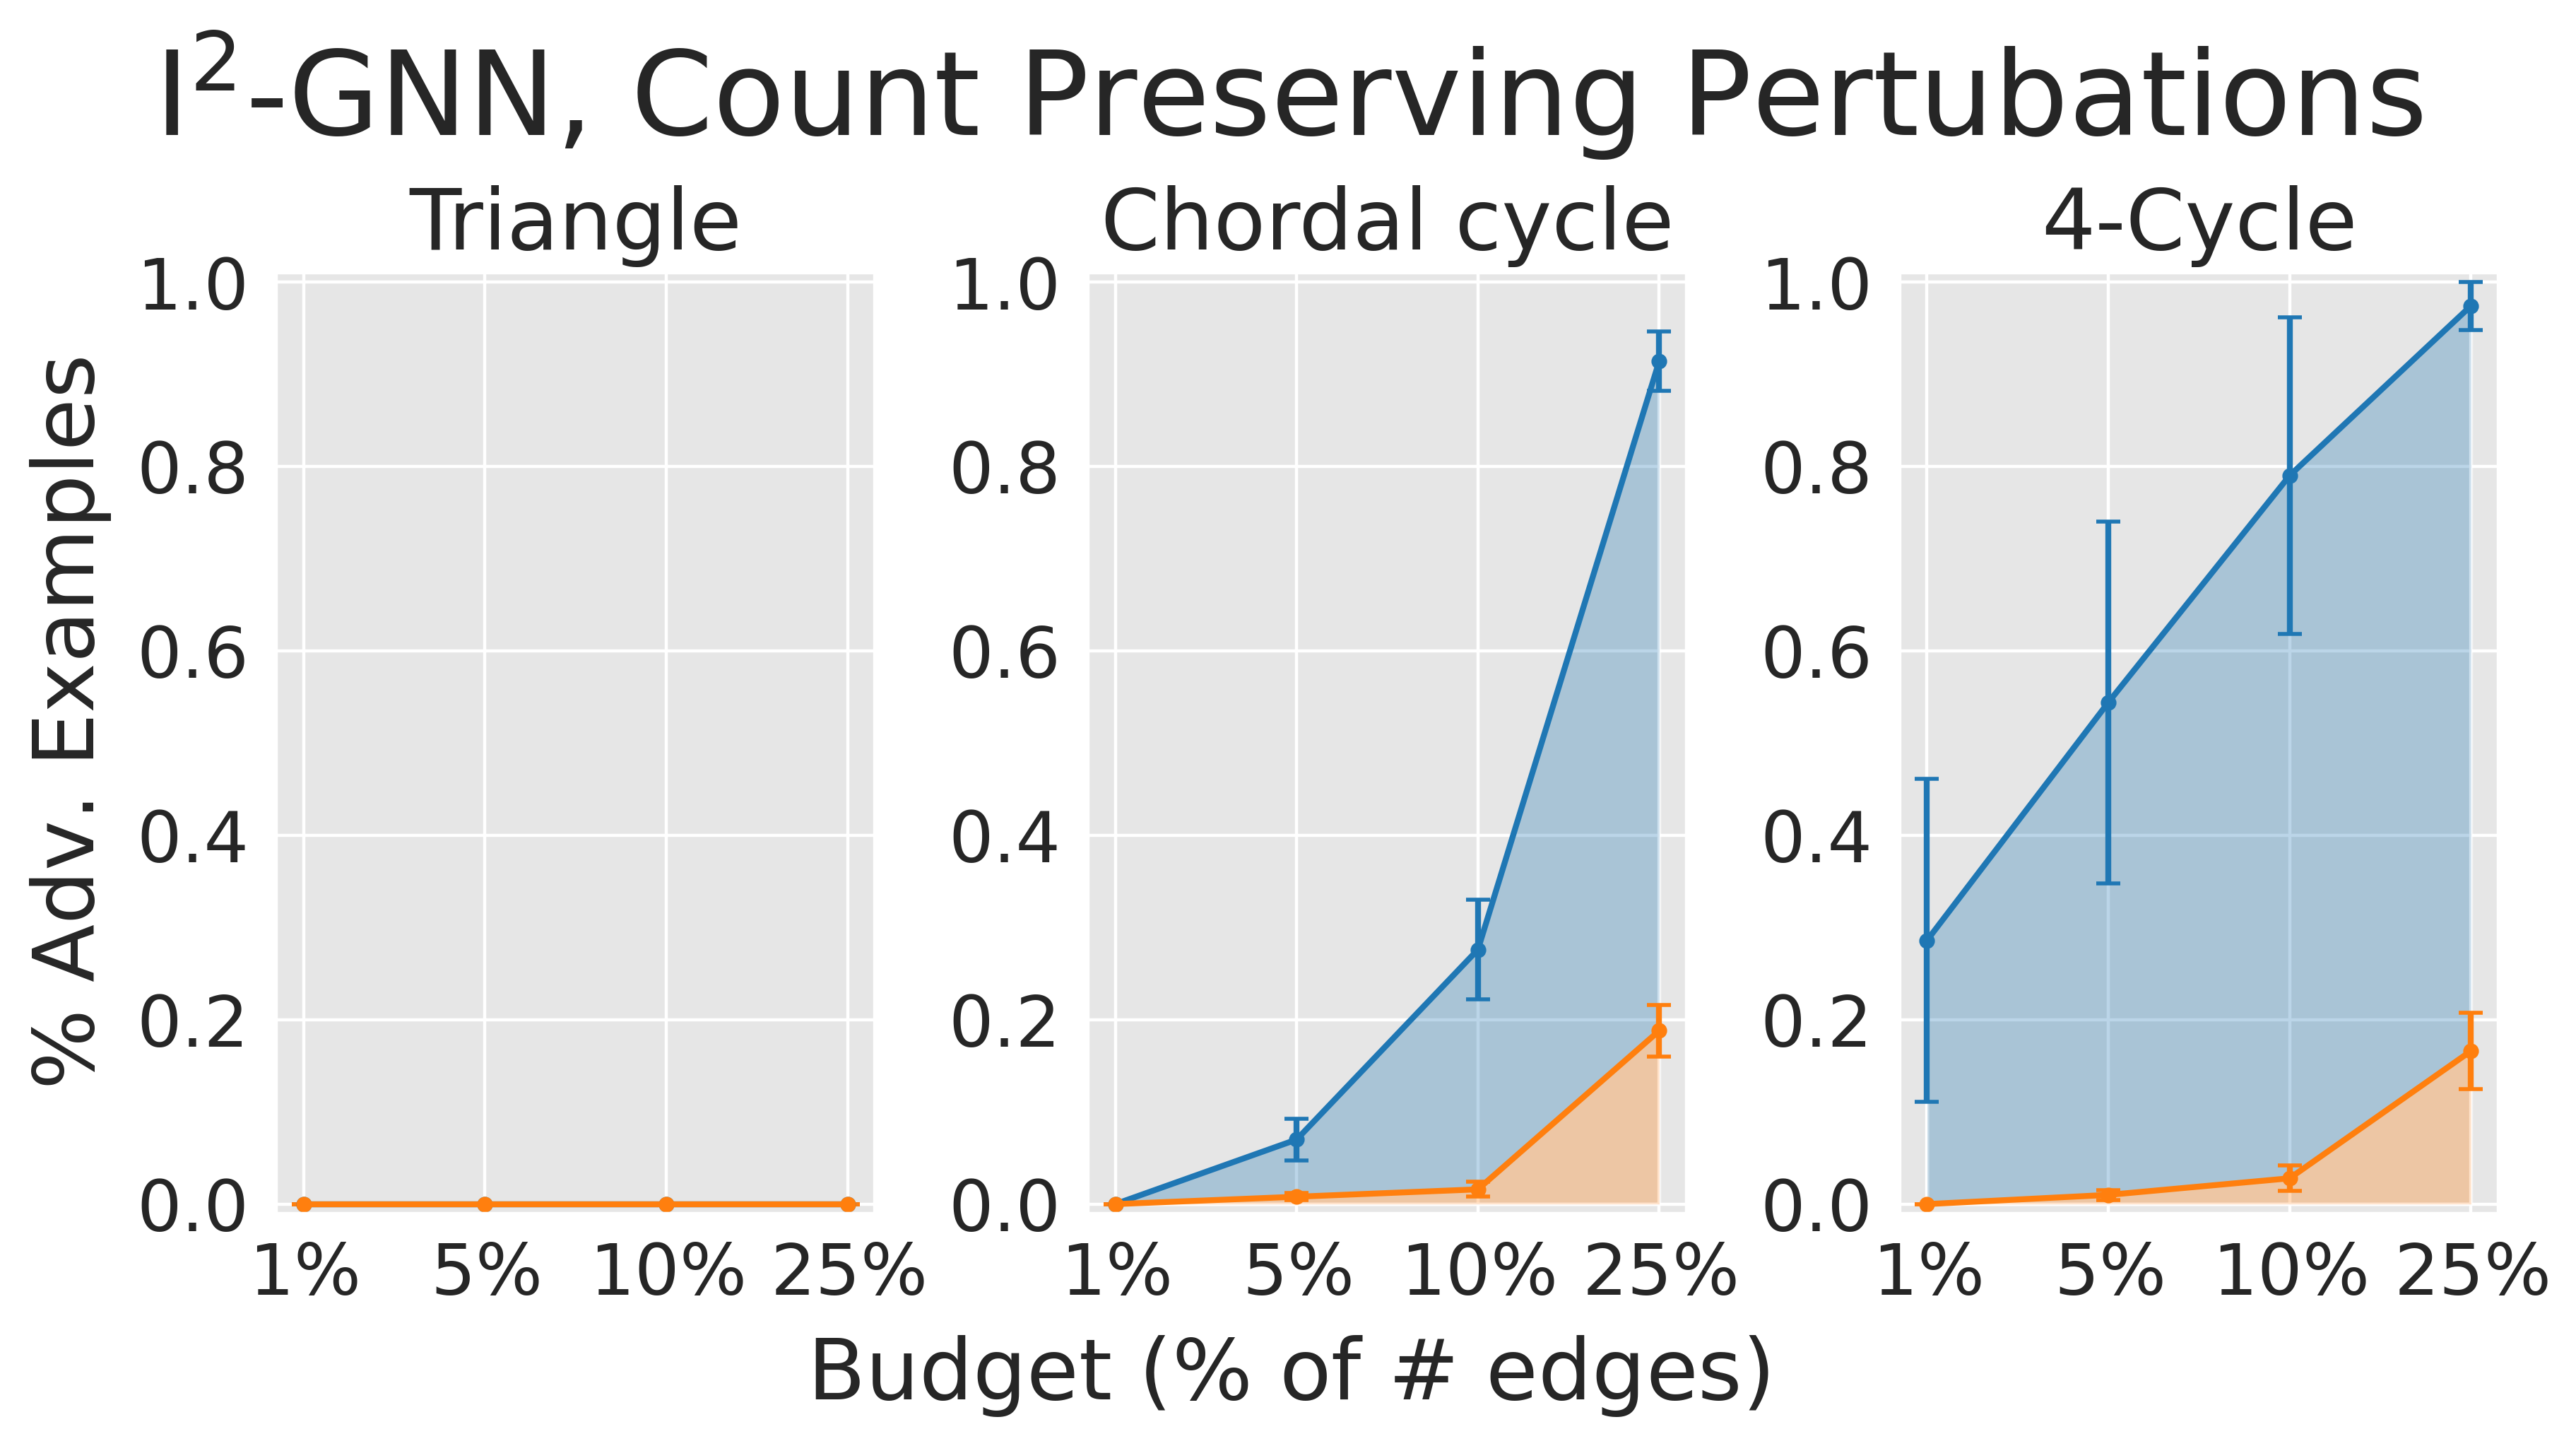

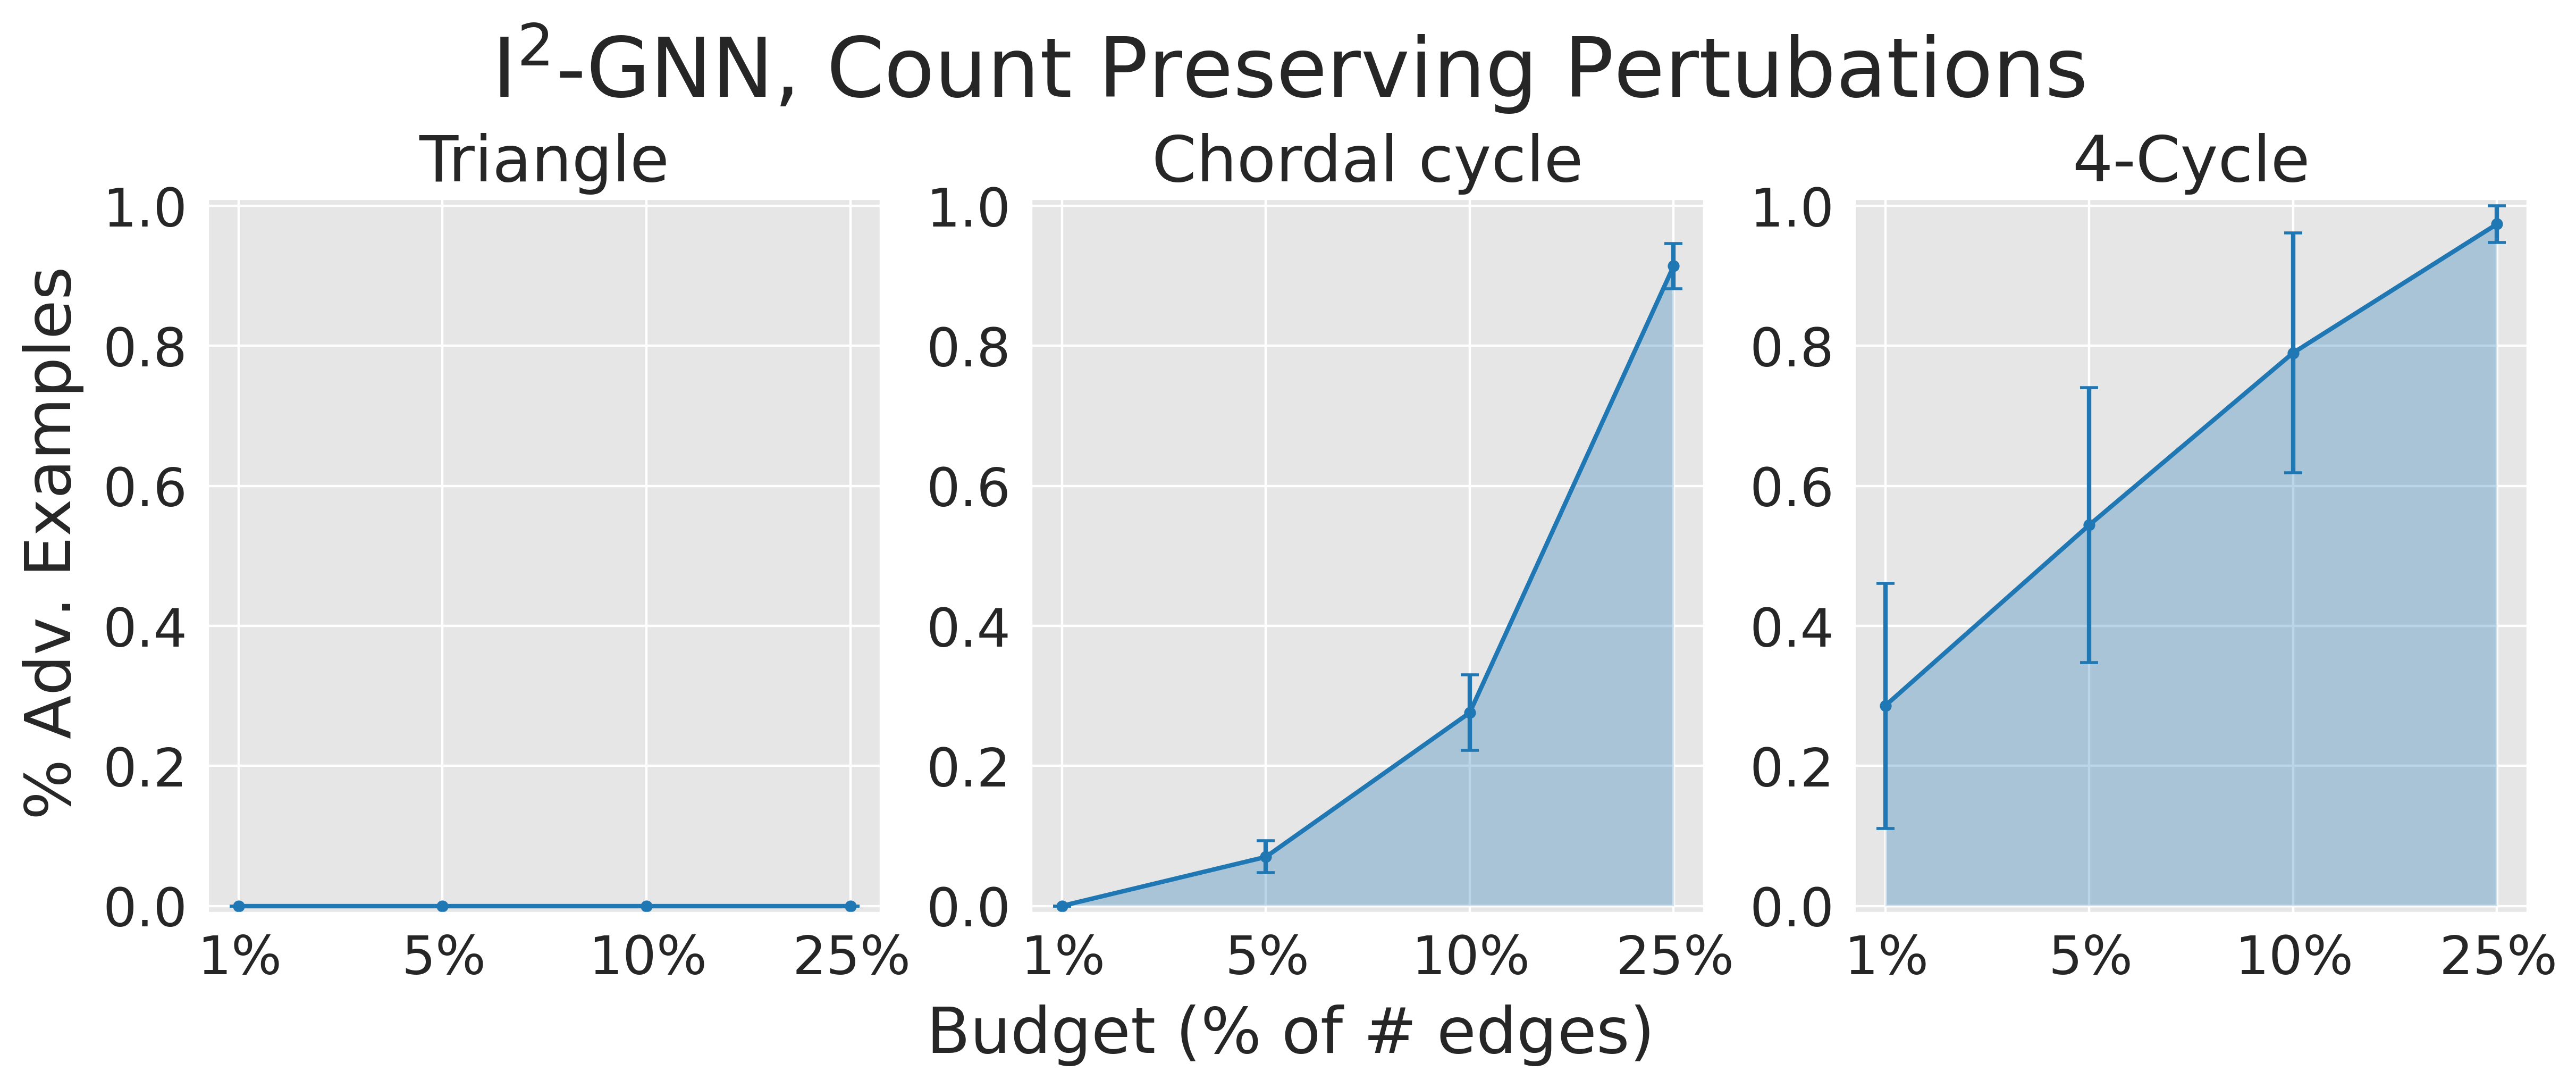

In [8]:
strategy = 'beam_preserve'
exp_info['strategy'] = 'Count Preserving Pertubations'
n_samples = 10
edge_addition = True
edge_deletion = True
results_1 = results
results_1 = results_1[results_1["config.loss"] == loss]
results_1 = results_1[results_1["config.adversarial_strategy"] == strategy]
results_1 = results_1[results_1["config.n_samples"] == n_samples]
results_1 = results_1[results_1["config.edge_addition"] == edge_addition]
results_1 = results_1[results_1["config.edge_deletion"] == edge_deletion]
print(len(results_1))

#adversarial_error(results_1, exp_info)
#sign_adversarial_error(results_1, exp_info)
# subgraph_count(results_1, exp_info)
#edge_count(results_1, exp_info)
real_adv_examples(results_1, exp_info, delta, edge, degree, graph, count, spath, spectrum, connectivity, sign_pres, count_sign, count_scatter, sign_adv, grad, edge_sign)

## Greedy random

consider oly permutations that leave the substructure count unchanged, keeping track of multiple examples at the same time

3525
[1, 4, 7, 20]
AOC 1 seed
Triangle:  0.19883333333333333
Chordal cycle:  0.72225
4-Cycle:  0.8815416666666667
AOC all seeds
Triangle:  0.1632916666666667
Chordal cycle:  0.4393333333333333
4-Cycle:  0.3517916666666667


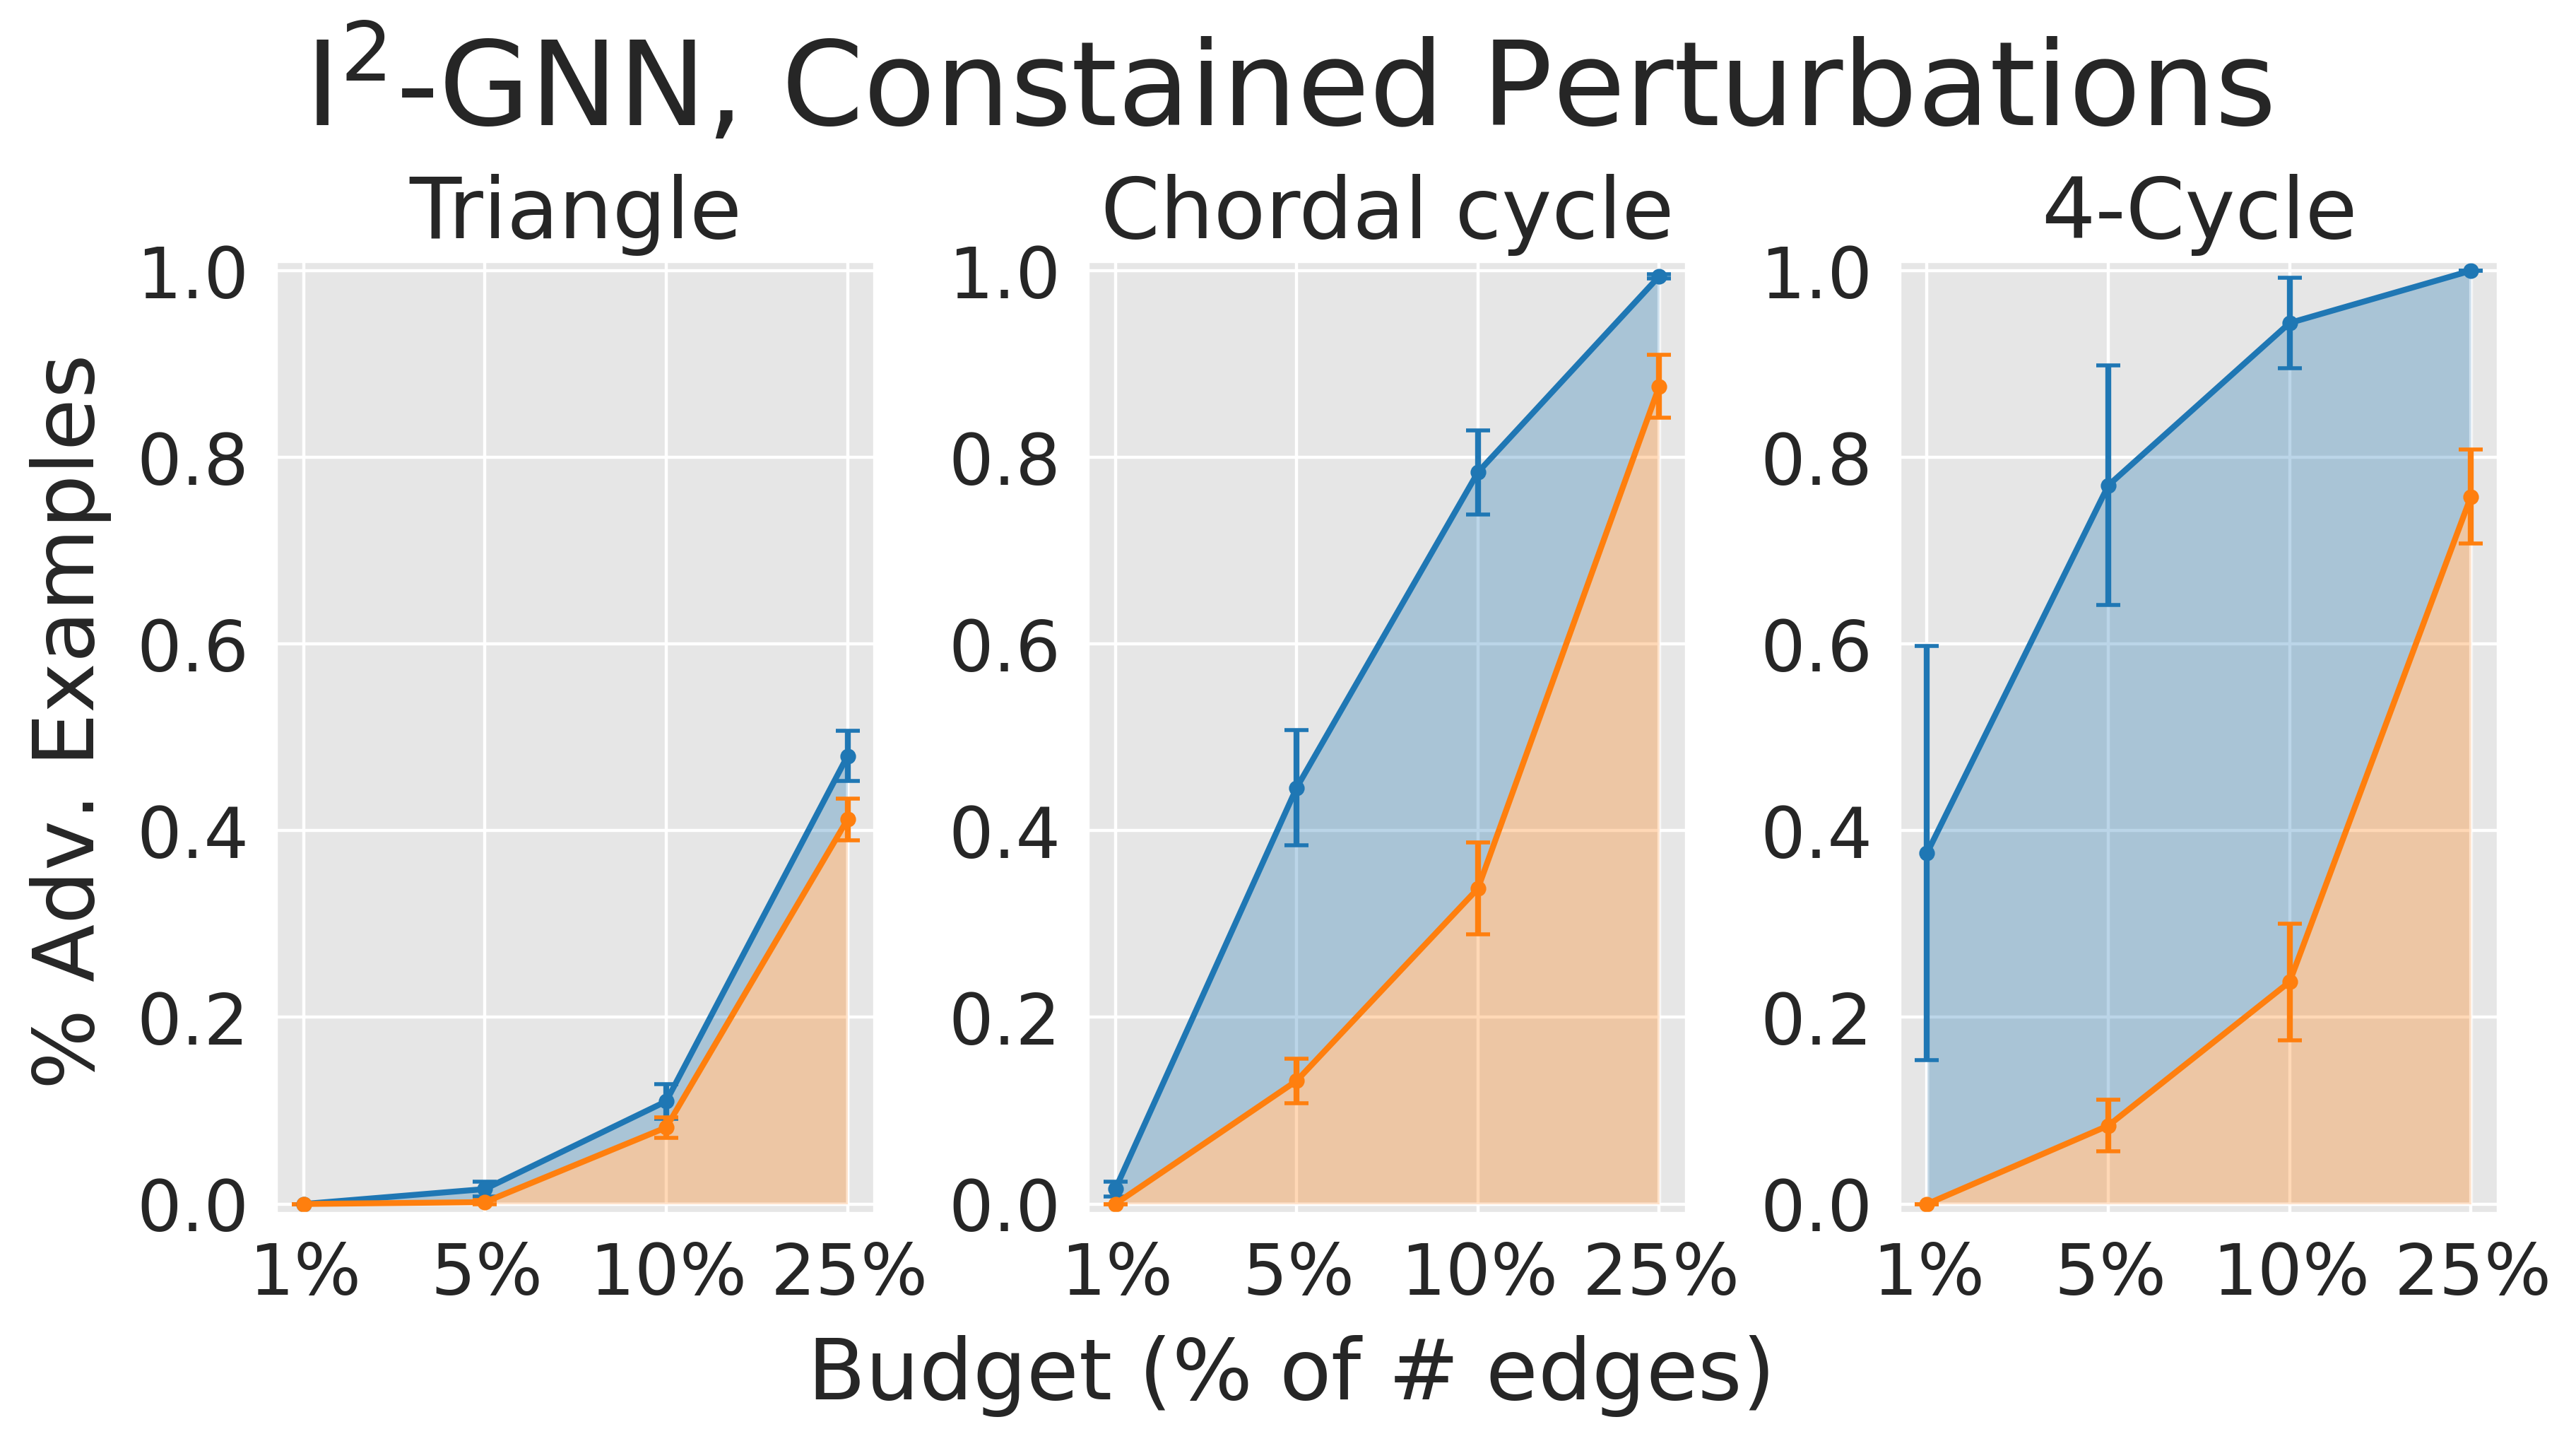

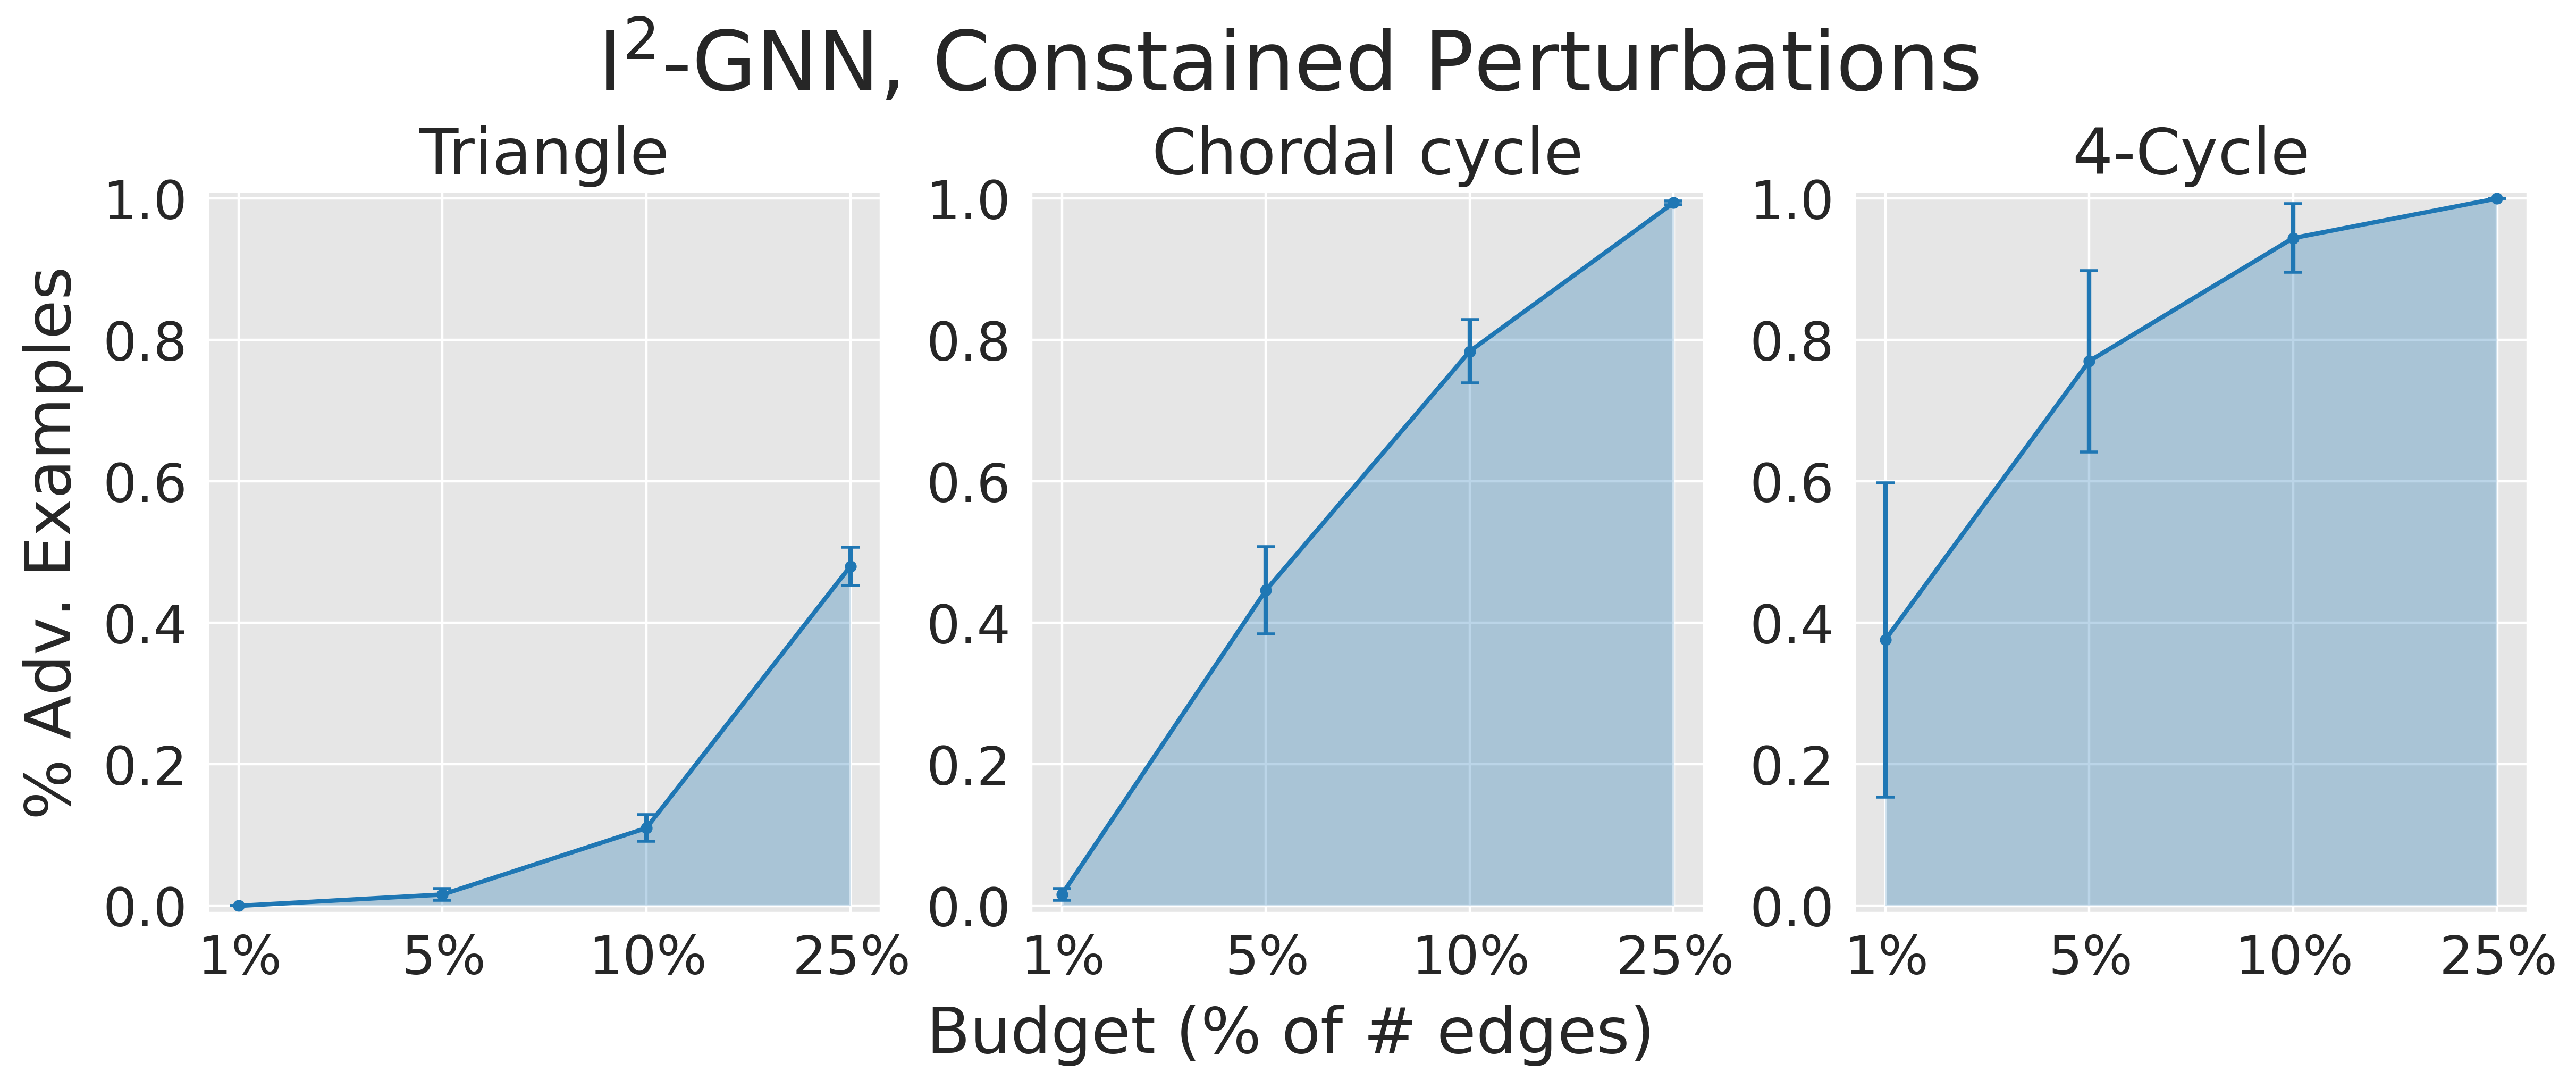

In [9]:
strategy = 'greedy_random'
exp_info['strategy'] = 'Constained Perturbations'
n_samples = 109
edge_addition = True
edge_deletion = False
results_2 = results
results_2 = results_2[results_2["config.loss"] == loss]
results_2 = results_2[results_2["config.adversarial_strategy"] == strategy]

results_2 = results_2[results_2["config.n_samples"] == n_samples]
print(len(results_2))
# results_2 = results_2[results_2["config.edge_addition"] == edge_addition]
# results_2 = results_2[results_2["config.edge_deletion"] == edge_deletion]

#adversarial_error(results_2, exp_info)
#sign_adversarial_error(results_2, exp_info)
#subgraph_count(results_2, exp_info)
#edge_count(results_2, exp_info)
real_adv_examples(results_2, exp_info, delta, edge, degree, graph, count, spath, spectrum, connectivity, count_scatter)

## Greedy preserving multiple strategy deletion

consider oly permutations that leave the substructure count unchanged, keeping track of multiple examples at the same time

In [10]:
# strategy = 'beam_preserve'
# exp_info['strategy'] = 'Preserve Beam Deletion'
# n_samples = 10
# edge_addition = False
# edge_deletion = True

# results_3 = results
# results_3 = results_3[results_3["config.loss"] == loss]
# results_3 = results_3[results_3["config.adversarial_strategy"] == strategy]
# results_3 = results_3[results_3["config.n_samples"] == n_samples]
# results_3 = results_3[results_3["config.edge_addition"] == edge_addition]
# results_3 = results_3[results_3["config.edge_deletion"] == edge_deletion]

# #adversarial_error(results_3, exp_info)
# #sign_adversarial_error(results_3, exp_info)
# #subgraph_count(results_3, exp_info)
# #edge_count(results_3, exp_info)
# real_adv_examples(results_3, exp_info, delta, edge, degree, graph, count, spath, spectrum, connectivity, count_sign, count_sign, count_scatter)

## Beam subgraph preserving 

3525
[1, 4, 7, 20]
AOC 1 seed
Triangle:  0.0
Chordal cycle:  0.38066666666666665
4-Cycle:  0.6633333333333334
AOC all seeds
Triangle:  0.0
Chordal cycle:  0.04666666666666667
4-Cycle:  0.011000000000000001


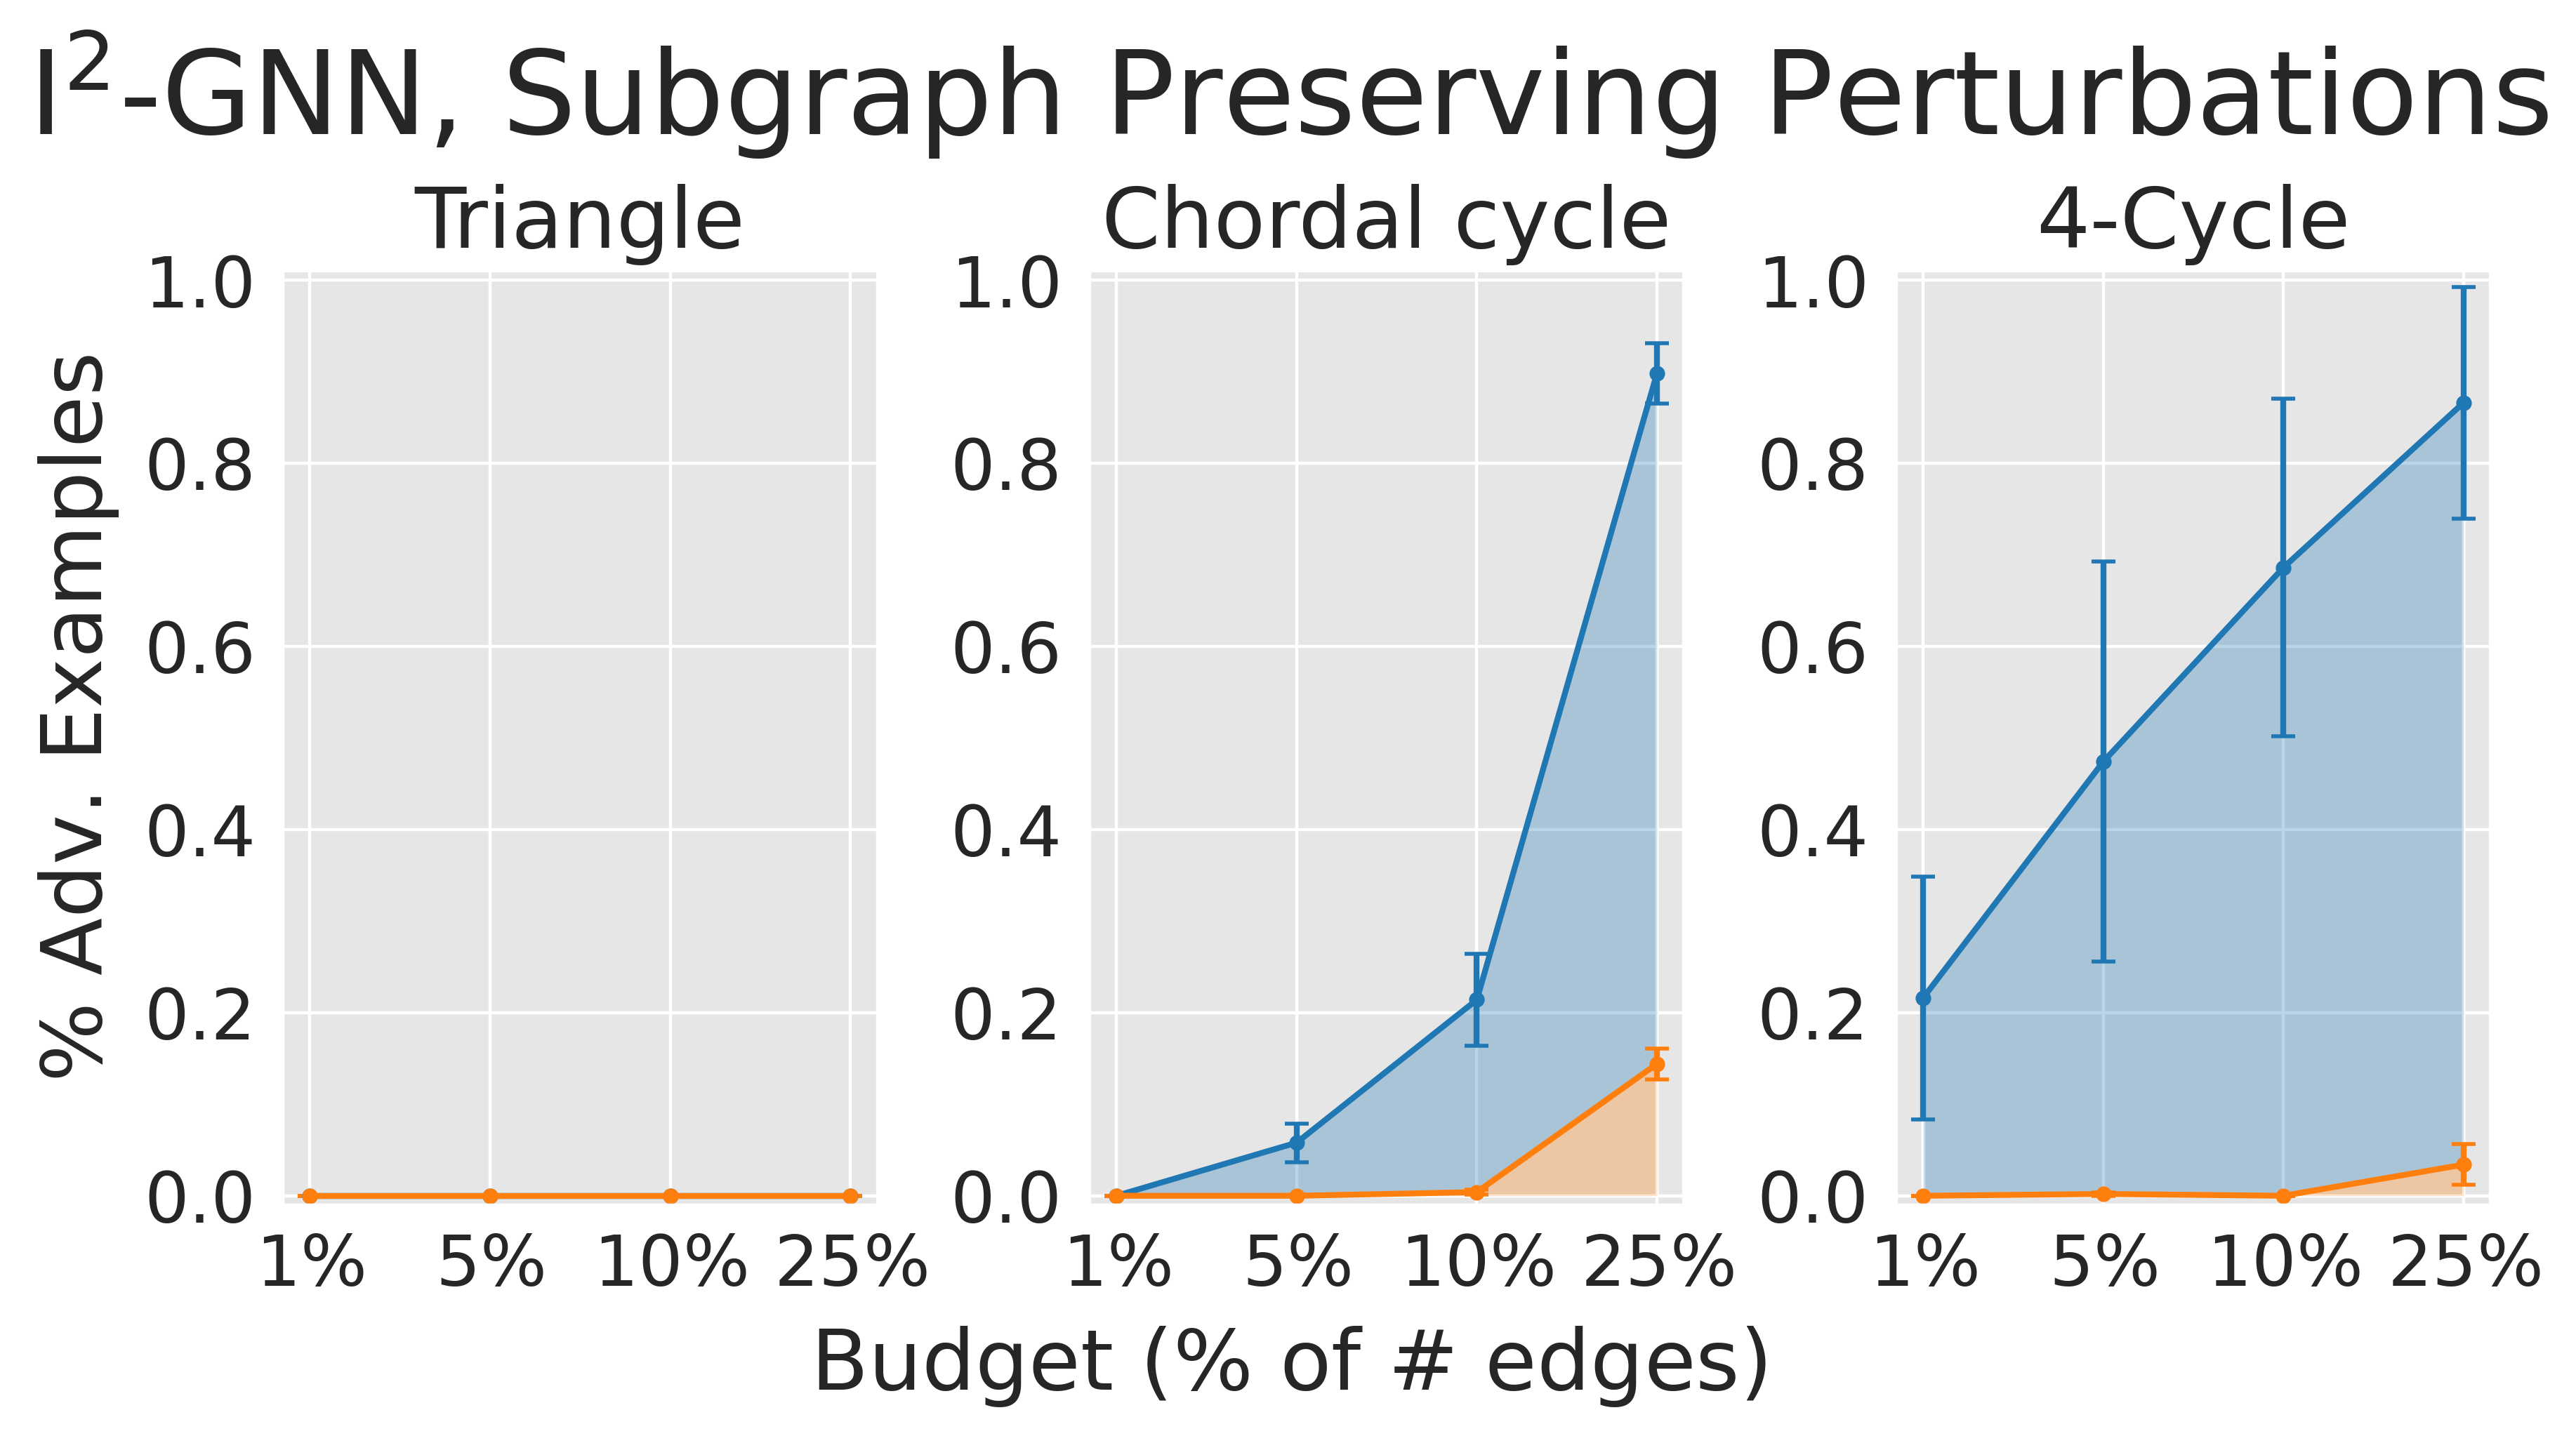

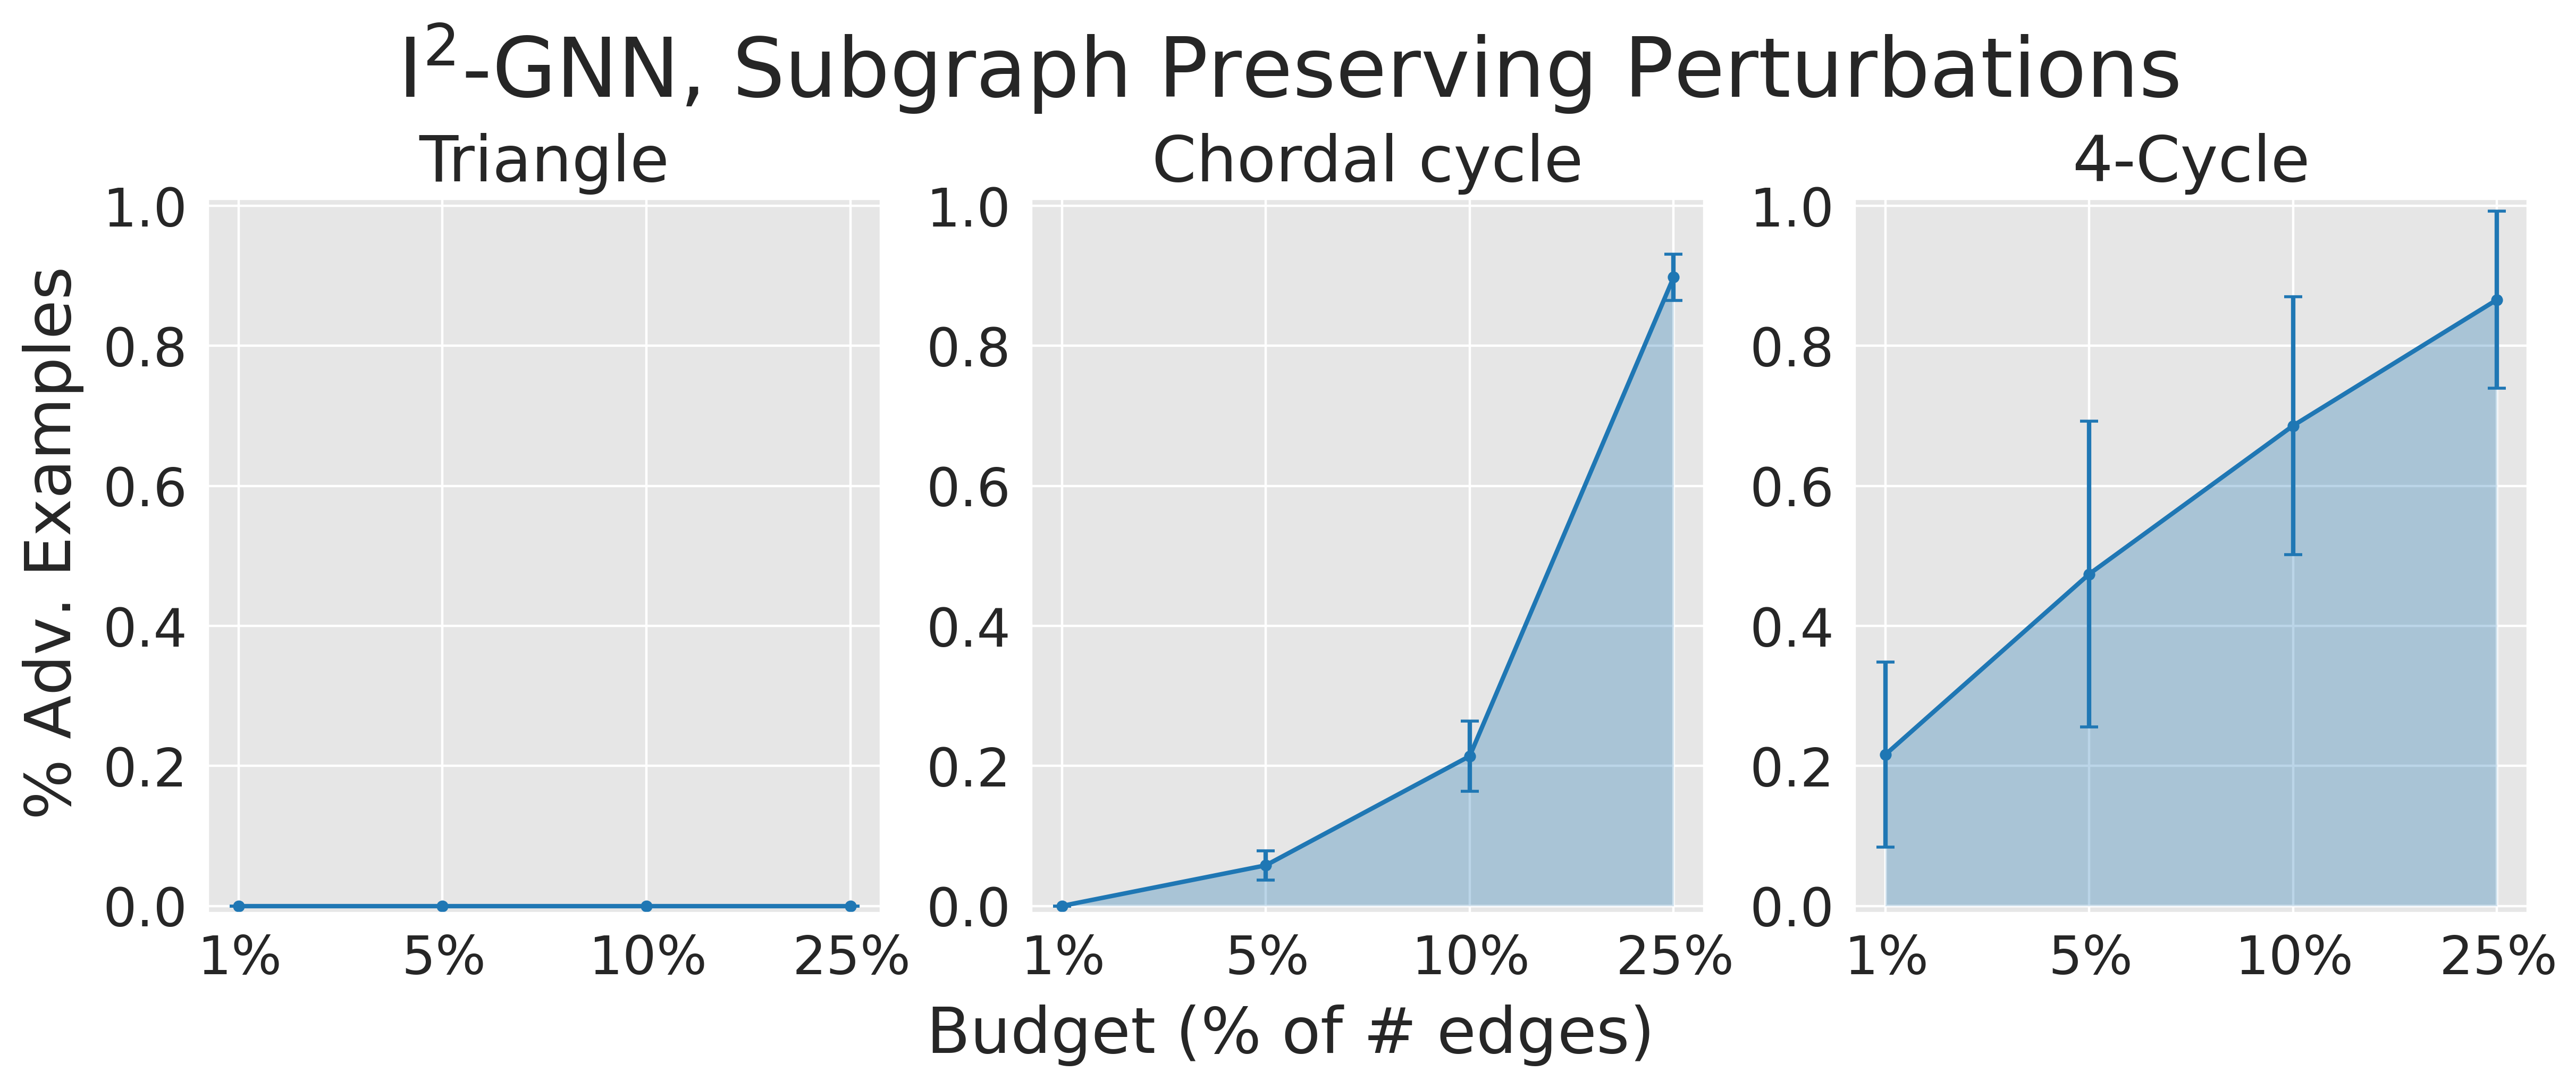

In [11]:
strategy = 'beam_subgraph_preserving'
exp_info['strategy'] = 'Subgraph Preserving Perturbations'
n_samples = 10

results_5 = results
results_5 = results_5[results_5["config.loss"] == loss]
results_5 = results_5[results_5["config.adversarial_strategy"] == strategy]
results_5 = results_5[results_5["config.n_samples"] == n_samples]
print(len(results_5))

# adversarial_error(results_5, exp_info)
#sign_adversarial_error(results_5, exp_info)
#subgraph_count(results_5, exp_info)
#edge_count(results_5, exp_info)
real_adv_examples(results_5, exp_info, delta, edge, degree, graph, count, spath, spectrum, connectivity, count_sign, count_sign, count_scatter, sign_adv, grad, edge_sign)

## Beam strategy

consider oly permutations that leave the substructure count unchanged

In [12]:
strategy = 'beam'
exp_info['strategy'] = 'Beam'
n_samples = 10

results_4 = results
results_4 = results_4[results_4["config.loss"] == loss]
results_4 = results_4[results_4["config.adversarial_strategy"] == strategy]
results_4 = results_4[results_4["config.n_samples"] == n_samples]
print(len(results_4))


#adversarial_error(results_4, exp_info)
#sign_adversarial_error(results_5, exp_info)
#subgraph_count(results_4, exp_info)
#edge_count(results_4, exp_info)
real_adv_examples(results_4, exp_info, delta, edge, degree, graph, count, spath, spectrum, connectivity, sign_pres, count_sign, count_scatter)

0


IndexError: single positional indexer is out-of-bounds

structural properties of properties of the adversarial graphs

## Random greedy strategy with 5% of possible permutations

Adversarial errors and stuctural properties of the adversarial graph

In [ ]:
strategy = 'greedy_random'
strategy_name = 'Random greedy (5%)'
n_samples = 11
delta = 5
edge=False
degree = True
graph = True
count = True
results_3 = results
results_3 = results_3[results_3["config.loss"] == loss]
results_3 = results_3[results_3["config.adversarial_strategy"] == strategy]
results_3 = results_3[results_3["config.n_samples"]==n_samples]

#adversarial_error(results_3, strategy_name)
# subgraph_count(results_3, strategy_name)
# edge_count(results_3, strategy_name)
#edge_count(results_2, strategy_name)
real_adv_examples(results_3, strategy_name, delta, edge, degree, graph, count)
    
    


## Comparison of adversarial error increase

Compare how the average edvarsarial error increases for the 3 different adversarial strategies 

In [ ]:
budget_1 = sum(results_1["config.budgets"].iloc[0])
budget_2 = budget_1 #sum(results_2["config.budgets"].iloc[0])
budget_3 = budget_1 #sum(results_3["config.budgets"].iloc[0])
fig_3, axes_3 = plt.subplots(3,3, constrained_layout=True)
fig_3.set_figwidth(15)
fig_3.set_figheight(15)
fig_3.suptitle(f"Mean of the adversarial error for increasing budget, {arch} {exp}", fontsize = 20)
for j, subgraph in enumerate(subgraphs):
    results_1_temp = results_1[results_1["Subgraph"] == subgraph]
    
    results_2_temp = results_2[results_2["Subgraph"] == subgraph]
    #results_3_temp = results_3[results_3["Subgraph"] == subgraph]
    err_mean_1 = np.empty(budget_1+1, dtype=float)
    err_mean_2 = np.empty(budget_2+1, dtype=float)
    #err_mean_3 = np.empty(budget_3+1, dtype=float)
    for i in range(budget_1+1):
        err_1 = results_1_temp['result.adversarial_error_history'].apply(lambda l: l[min(i, len(l)-1)])
        err_mean_1[i] = err_1.mean()
    for i in range(budget_2+1):
        err_2 = results_2_temp['result.adversarial_error_history'].apply(lambda l: l[min(i, len(l)-1)])
        err_mean_2[i] = err_2.mean()
    # for i in range(budget_3+1):
    #     err_3 = results_3_temp['result.adversarial_error_history'].apply(lambda l: l[min(i, len(l)-1)])
    #     err_mean_3[i] = err_3.mean()
    x_1 = list(range(budget_1+1))
    x_2 = list(range(budget_2+1))
    #x_3 = list(range(budget_3+1))
    # mean
    axes_3[j//3][j%3].plot(x_1, err_mean_1, label="Preserve Greedy")
    axes_3[j//3][j%3].plot(x_2, err_mean_2, label="Random greedy 50%")
    #axes_3[j//3][j%3].plot(x_3, err_mean_3, label="Random greedy 5%")
    axes_3[j//3][j%3].set_xlabel('Budget')
    axes_3[j//3][j%3].set_ylabel(loss_name)
    axes_3[j//3][j%3].set_title(f'Subgraph {subgraph}')
    axes_3[j//3][j%3].legend()
plt.show()

print(f'average runtime greedy: {results_1["stats.real_time"].mean()} s')
print(f'average runtime random greedy 50%: {results_2["stats.real_time"].mean()} s')
#print(f'average runtime random greedy 5%: {results_3["stats.real_time"].mean()} s')